# **6. 다양한 머신러닝 기법들**
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML2nd
*  저작권 : 본 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### **6.11 사이킷런을 이용한 서포트 벡터 머신 사용하기**

In [1]:
import pandas as pd
import numpy as np
data_loc = 'https://github.com/dknife/ML2nd/raw/main/data/'
df = pd.read_csv(data_loc + 'two_classes.csv')
df.tail(5)

,x1,x2,y
995,2.664896,-33.240534,0
996,-2.019928,5.687221,1
997,-4.634470,5.102681,1
998,1.426275,-47.015037,0
999,1.988053,24.930404,0


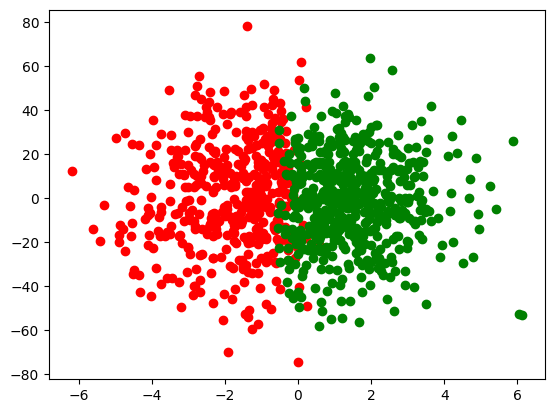

In [2]:
df_positive = df[df['y']>0]     # y가 1인 데이터만 추출
df_negative = df[df['y']==0]    # y가 0인 데이터만 추출
import matplotlib.pyplot as plt
plt.scatter(df_positive['x1'], df_positive['x2'], color='r')
plt.scatter(df_negative['x1'], df_negative['x2'], color='g')

In [3]:
from sklearn.svm import LinearSVC
X = df[['x1', 'x2']]                      # x1, x2를 입력 벡터로 한다
y = df['y']                               # y열의 값이 레이블
svm_simple = LinearSVC(C=1, loss='hinge') # SVM 클래스 생성
svm_simple.fit(X, y)                      # 입력과 레이블로 SVM 학습 실시

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

In [4]:
svm_simple.predict([[0.12, 0.56], [-4, 40],  [0, 40], [5,20]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([0, 1, 0, 0])

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


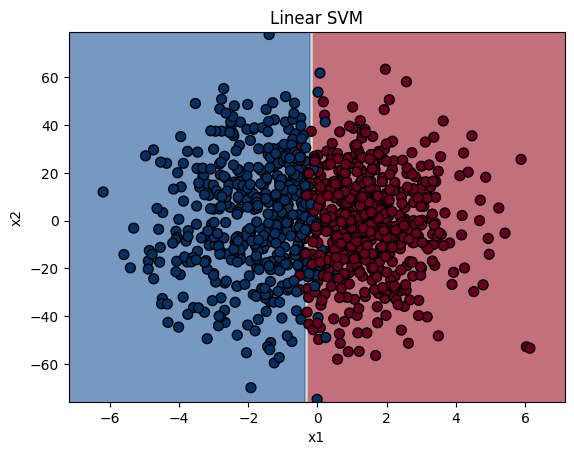

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

svm_simple.fit(X, y)   # 먼저 학습
DecisionBoundaryDisplay.from_estimator(
    svm_simple, X, cmap="RdBu", alpha=0.6, response_method="predict"
)
plt.scatter(X['x1'], X['x2'], c=y, cmap="RdBu", edgecolor='k', s=50)
plt.title("Linear SVM")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()